In [281]:
import requests
from bs4 import BeautifulSoup

In [283]:
url="https://en.wikipedia.org/wiki/List_of_largest_companies_in_the_United_States_by_revenue"

In [285]:
page=requests.get(url)
print(page)

<Response [200]>


In [287]:
soup=BeautifulSoup(page.text,"html")


In [288]:
table=soup.find_all('table')[1]

In [289]:
print(table)

<table class="wikitable sortable">
<tbody><tr>
<th>Rank
</th>
<th>Name
</th>
<th>Industry
</th>
<th>Revenue <br/>(USD billions)
</th>
<th>Employees
</th>
<th>Headquarters
</th></tr>
<tr>
<td>1
</td>
<td><a href="/wiki/Cargill" title="Cargill">Cargill</a>
</td>
<td>Food industry
</td>
<td style="text-align:center;">177
</td>
<td style="text-align:center;">160,000
</td>
<td><a href="/wiki/Minnetonka,_Minnesota" title="Minnetonka, Minnesota">Minnetonka, Minnesota</a>
</td></tr>
<tr>
<td>2
</td>
<td><a class="mw-redirect" href="/wiki/Koch_Industries" title="Koch Industries">Koch Industries</a>
</td>
<td>Conglomerate
</td>
<td style="text-align:center;">125
</td>
<td style="text-align:center;">120,000
</td>
<td><a href="/wiki/Wichita,_Kansas" title="Wichita, Kansas">Wichita, Kansas</a>
</td></tr>
<tr>
<td>3
</td>
<td><a class="mw-redirect" href="/wiki/Publix_Super_Markets" title="Publix Super Markets">Publix Super Markets</a>
</td>
<td>Retail
</td>
<td style="text-align:center;">54.5
</td>


In [290]:
word_titles=table.find_all('th')

In [291]:
print(word_titles)

[<th>Rank
</th>, <th>Name
</th>, <th>Industry
</th>, <th>Revenue <br/>(USD billions)
</th>, <th>Employees
</th>, <th>Headquarters
</th>]


In [292]:
word_table_title=[title.text.strip("\n") for title in word_titles]
print(word_table_title)


['Rank', 'Name', 'Industry', 'Revenue (USD billions)', 'Employees', 'Headquarters']


In [293]:
import pandas as pd

In [294]:
df=pd.DataFrame(columns=word_table_title)

In [295]:
column_data=table.find_all('tr')

In [296]:
for row in column_data[1:]:
    row_data = row.find_all('td')  
    individual_row_data = [data.text.strip() for data in row_data]
    

    length=len(df)
    df.loc[length]= individual_row_data

In [297]:
df

,Rank,Name,Industry,Revenue (USD billions),Employees,Headquarters
0,1,Cargill,Food industry,177,"160,000","Minnetonka, Minnesota"
1,2,Koch Industries,Conglomerate,125,"120,000","Wichita, Kansas"
2,3,Publix Super Markets,Retail,54.5,"250,000","Lakeland, Florida"
3,4,"Mars, Incorporated",Food industry,47,"140,000","McLean, Virginia"
4,5,H-E-B,Retail,43.6,"145,000","San Antonio, Texas"
5,6,Reyes Holdings,Wholesaling,40,"36,000","Rosemont, Illinois"
6,7,Enterprise Holdings,Car rental,35,"90,000","Clayton, Missouri"
7,8,C&S Wholesale Grocers,Wholesaling,34.7,"15,000","Keene, New Hampshire"
8,9,Love's,Petroleum industry and Retail,26.5,"40,000","Oklahoma City, Oklahoma"
9,10,Southern Glazer's Wine and Spirits,Food industry,26.0,"24,000","Miramar, Florida"


In [298]:
df.to_csv(r'E:\kkonnect.io\Companies.csv',index=False)

#Data Exploration

In [300]:
df.shape

(10, 6)

In [301]:
df.dtypes

Rank                      object
Name                      object
Industry                  object
Revenue (USD billions)    object
Employees                 object
Headquarters              object
dtype: object

In [302]:
df.dtypes

Rank                      object
Name                      object
Industry                  object
Revenue (USD billions)    object
Employees                 object
Headquarters              object
dtype: object

In [303]:
df['Rank'] = df['Rank'].astype(float)

In [304]:
df['Employees'] = df['Employees'].str.replace(',', '').astype(float)

In [305]:
df['Revenue (USD billions)']=df['Revenue (USD billions)'].astype(float)

In [306]:
print("\nData Types after cleaning:\n", df.dtypes)


Data Types after cleaning:
 Rank                      float64
Name                       object
Industry                   object
Revenue (USD billions)    float64
Employees                 float64
Headquarters               object
dtype: object


In [307]:
df.describe(include='number')

,Rank,Revenue (USD billions),Employees
count,10.00000,10.000000,10.000000
mean,5.50000,60.930000,102000.000000
std,3.02765,49.796141,75190.129376
min,1.00000,26.000000,15000.000000
25%,3.25000,34.775000,37000.000000
50%,5.50000,41.800000,105000.000000
75%,7.75000,52.625000,143750.000000
max,10.00000,177.000000,250000.000000


In [308]:
df.isnull().sum()

Rank                      0
Name                      0
Industry                  0
Revenue (USD billions)    0
Employees                 0
Headquarters              0
dtype: int64

In [309]:

print("\nMissing Values after cleaning:\n", df.isnull().sum())


Missing Values after cleaning:
 Rank                      0
Name                      0
Industry                  0
Revenue (USD billions)    0
Employees                 0
Headquarters              0
dtype: int64


In [310]:
# Unique industries
print("\n🔹 Industry Counts:")
print(df['Industry'].value_counts())


🔹 Industry Counts:
Industry
Food industry                    3
Retail                           2
Wholesaling                      2
Conglomerate                     1
Car rental                       1
Petroleum industry and Retail    1
Name: count, dtype: int64


In [311]:
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\payaswini\AppData\Local\Temp\ipykernel_1036\320422901.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Revenue (USD billions)', y='Name', data=df.sort_values(by='Revenue (USD billions)', ascending=False), palette='Blues_d')


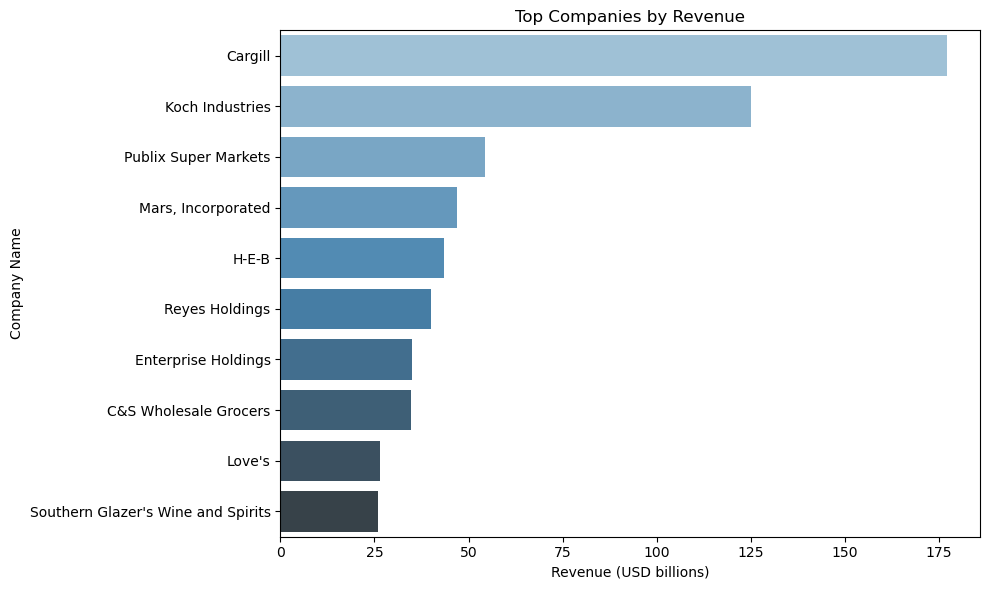

In [312]:
# Plot: Bar chart of Revenue
plt.figure(figsize=(10,6))
sns.barplot(x='Revenue (USD billions)', y='Name', data=df.sort_values(by='Revenue (USD billions)', ascending=False), palette='Blues_d')
plt.title("Top Companies by Revenue")
plt.xlabel("Revenue (USD billions)")
plt.ylabel("Company Name")
plt.tight_layout()
plt.show()


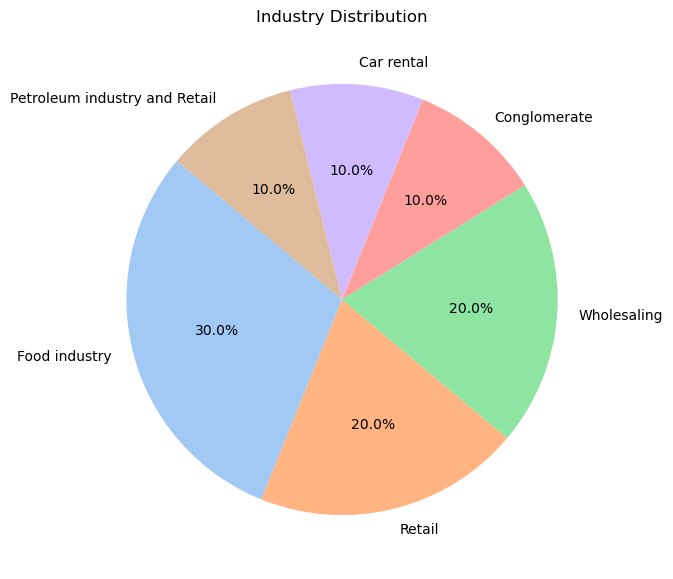

In [313]:
# Plot: Pie chart of Industry distribution
plt.figure(figsize=(7,7))
df['Industry'].value_counts().plot.pie(autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title("Industry Distribution")
plt.ylabel('')
plt.show()


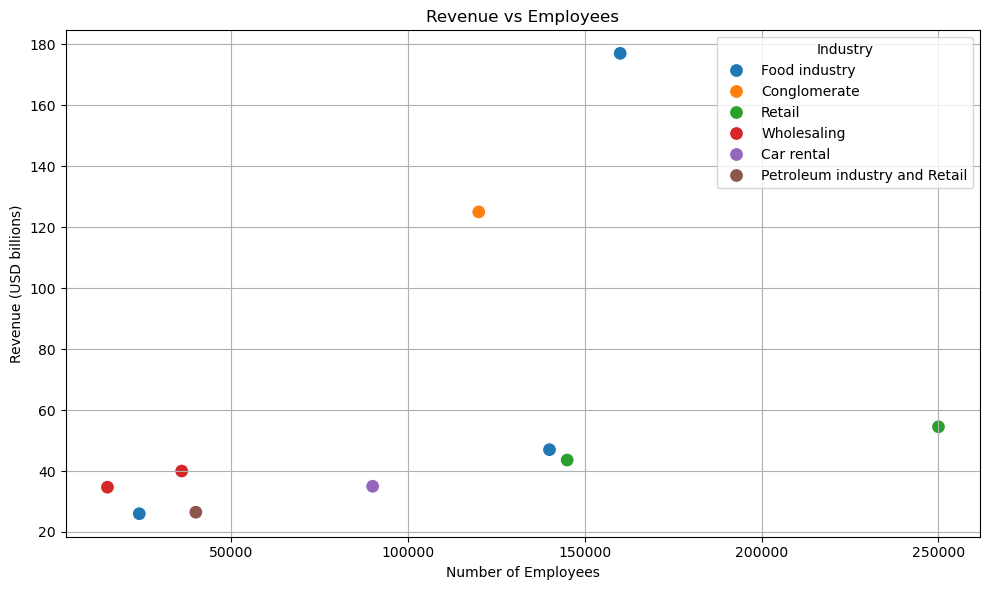

In [314]:
# Plot: Scatter of Revenue vs Employees
plt.figure(figsize=(10,6))
sns.scatterplot(x='Employees', y='Revenue (USD billions)', hue='Industry', data=df, palette='tab10', s=100)
plt.title("Revenue vs Employees")
plt.xlabel("Number of Employees")
plt.ylabel("Revenue (USD billions)")
plt.grid(True)
plt.tight_layout()
plt.show()